# Exploratory analysis of the Coursera course dataset

This file provides the analysis of the Coursera course dataset dowloaded from Kaggle (https://www.kaggle.com/datasets/siddharthm1698/coursera-course-dataset). The dataset was built by scrapping data from the official Coursera website and contains general information (such as course title, organization providing the course, certificate type, course difficulty, course rating, numbers of enrolled students) about 890 Coursera courses. The aims of the analysis of this dataset are to practise data visualization skills as well as to better understand the competitive environment of massive open online courses (MOOC) (the understanding could be valuable for those who are planning to develop their own online courses). 

## Preparing for analysis: importing and cleaning the data


The first step is to import the data from the Kaggle website and libraries that will be necessary for the analysis. Then the data will be cleaned and prepared for the analysis (checked for missing values, duplicates, and outliers, transformed if necessary). 

### Importing Python libraries for data analysis

In [1]:
import pandas as pd
import numpy as np
import re
import geopandas as gpd
import matplotlib.pyplot as plt
from mpl_toolkits.axes_grid1 import make_axes_locatable
import seaborn as sns
import imageio
import pathlib
import mapclassify as mc
import requests
import json
import time


### Importing the Coursera data into the Pandas dataframe and familiarising with the data

In [2]:
coursera = pd.read_csv('/Users/user/PycharmProjects/Coursera/data/coursera_data.csv', encoding="UTF-8")


In [3]:
coursera.head()

,Unnamed: 0,course_title,course_organization,course_Certificate_type,course_rating,course_difficulty,course_students_enrolled
0,134,(ISC)² Systems Security Certified Practitioner...,(ISC)²,SPECIALIZATION,4.7,Beginner,5.3k
1,743,A Crash Course in Causality: Inferring Causal...,University of Pennsylvania,COURSE,4.7,Intermediate,17k
2,874,A Crash Course in Data Science,Johns Hopkins University,COURSE,4.5,Mixed,130k
3,413,A Law Student's Toolkit,Yale University,COURSE,4.7,Mixed,91k
4,635,A Life of Happiness and Fulfillment,Indian School of Business,COURSE,4.8,Mixed,320k


In [4]:
coursera.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 7 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Unnamed: 0                891 non-null    int64  
 1   course_title              891 non-null    object 
 2   course_organization       891 non-null    object 
 3   course_Certificate_type   891 non-null    object 
 4   course_rating             891 non-null    float64
 5   course_difficulty         891 non-null    object 
 6   course_students_enrolled  891 non-null    object 
dtypes: float64(1), int64(1), object(5)
memory usage: 48.9+ KB


In [5]:
coursera=coursera.iloc[:,1:7]

In [6]:
coursera.head()


,course_title,course_organization,course_Certificate_type,course_rating,course_difficulty,course_students_enrolled
0,(ISC)² Systems Security Certified Practitioner...,(ISC)²,SPECIALIZATION,4.7,Beginner,5.3k
1,A Crash Course in Causality: Inferring Causal...,University of Pennsylvania,COURSE,4.7,Intermediate,17k
2,A Crash Course in Data Science,Johns Hopkins University,COURSE,4.5,Mixed,130k
3,A Law Student's Toolkit,Yale University,COURSE,4.7,Mixed,91k
4,A Life of Happiness and Fulfillment,Indian School of Business,COURSE,4.8,Mixed,320k


### Checking for missing values and duplicates

The following code lines were used to check for missing values and duplicates. It appearated that there is no missing values and duplicates in the data frame.

In [7]:
np.where(coursera.isnull())

(array([], dtype=int64), array([], dtype=int64))

In [8]:
for i in range(len(coursera.iloc[:,0])):
    if coursera.duplicated() is True:
        print(f'There are duplicates in row {i}.')
print(f'There are no duplicates in the dataframe.')

There are no duplicates in the dataframe.


### Transforming the variable 'course_students_enrolled" to numerical

The initial observation of the dataframe revealed that the variable "course_students_enrolled" is not numerical and contains both digits and letters as well as dot characters and spaces. It was decided to transform this variable to integer by replacing the letters and dot characters with corresponding digits and removing spaces. The transformation was conducted with the help of Python library regex.

In [9]:
for i in range(len(coursera.iloc[:,0])):
    if re.findall("[.]",coursera.loc[i,"course_students_enrolled"]):
        coursera.loc[i,"course_students_enrolled"]= \
        re.sub(r"k\b", r"00", coursera.loc[i,"course_students_enrolled"], count=0)
    else:
        coursera.loc[i,"course_students_enrolled"]= \
        re.sub(r"k\b", r"000", coursera.loc[i,"course_students_enrolled"], count=0)
for i in range(len(coursera.iloc[:,0])):
    if re.findall("[.]",coursera.loc[i,"course_students_enrolled"]):
        coursera.loc[i,"course_students_enrolled"]= \
        re.sub(r"m\b", r"00000", coursera.loc[i,"course_students_enrolled"], count=0)
    else:
        coursera.loc[i,"course_students_enrolled"]= \
        re.sub(r"m\b", r"000000", coursera.loc[i,"course_students_enrolled"], count=0)
for i in range(len(coursera.iloc[:,0])):
    coursera.loc[i,"course_students_enrolled"]= \
    re.sub(r"[.]", r"", coursera.loc[i,"course_students_enrolled"], count=0)
for i in range(len(coursera.iloc[:,0])):
    coursera.loc[i,"course_students_enrolled"]= \
    re.sub(r"\s+", r"", coursera.loc[i,"course_students_enrolled"], count=0)

The following code checks if any of non digit characters remain. It appear that there are no noo digit characters.

In [10]:
for i in range(len(coursera.iloc[:,0])):
    if re.findall(r"[^0123456789]",coursera.loc[i,"course_students_enrolled"]):
        print(re.findall(r"[^0123456789]",coursera.loc[i,"course_students_enrolled"]))

The variable is transformed into integer with the following code:

In [11]:
coursera.loc[:,"course_students_enrolled"]=coursera.loc[:,"course_students_enrolled"].astype(int)

/var/folders/wx/s3l88rn93qv3r95828b9r68h0000gn/T/ipykernel_73934/527259158.py:1: DeprecationWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either `df[df.columns[i]] = newvals` or, if columns are non-unique, `df.isetitem(i, newvals)`
  coursera.loc[:,"course_students_enrolled"]=coursera.loc[:,"course_students_enrolled"].astype(int)


The string variable 'course_students_enrolled' was succesfully transformed into the integer-type variable (see the code output bellow).

In [12]:
coursera["course_students_enrolled"]


0        5300
1       17000
2      130000
3       91000
4      320000
        ...  
886     52000
887     21000
888     30000
889      9800
890     38000
Name: course_students_enrolled, Length: 891, dtype: int64

In [13]:
coursera.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 6 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   course_title              891 non-null    object 
 1   course_organization       891 non-null    object 
 2   course_Certificate_type   891 non-null    object 
 3   course_rating             891 non-null    float64
 4   course_difficulty         891 non-null    object 
 5   course_students_enrolled  891 non-null    int64  
dtypes: float64(1), int64(1), object(4)
memory usage: 41.9+ KB


### Checking for outliers

Next, two numerical variables of the data frame ("course_rating" and "course_students_enrolled") were checked for outliers. A function for finding outliers was designed following the advice provided by this article (https://hersanyagci.medium.com/detecting-and-handling-outliers-with-pandas-7adbfcd5cad8). Tukey’s rule to detect outliers (also known as the IQR rule) was used. The function calculates the Interquartile Range of the data (IQR = Q3 — Q1) and determines outlier boundaries with IQR. 

In [14]:
def find_outliers(x,coef):
    '''
    The function to find outliers in numerical variables on the basis of IQR rule
    '''
    Q1 = coursera.iloc[:,x].quantile(0.25)
    Q3 = coursera.iloc[:,x].quantile(0.75)
    IQR = Q3 - Q1
    lower_lim = Q1 - coef*IQR
    upper_lim = Q3 + coef*IQR
    for data in range(len(coursera.iloc[:,0])):
        if coursera.iloc[data,x] < lower_lim:
            print(f'Outlier for the index value {data} of the feature {coursera.columns[x]}: \
                  {round(coursera.iloc[data,x],3)}.')
            count_lower.append(data)
        elif coursera.iloc[data,x] > upper_lim:
            print(f'Outlier for the index value {data} of the feature {coursera.columns[x]}: \
                  {round(coursera.iloc[data,x],3)}.')
            count_upper.append(data)
        

The lower boundary is calculated as Q1–2 * IQR and the upper boundary as Q3 + 2 * IQR. The function is run for each value of both variables. The outputs of the function show outliers for both variables (see bellow).

In [15]:
print('Outliers for the feature course_rating:\n')
count_lower = []    
count_upper = []
find_outliers(3, 2)
print(f'\nIn total, there are {len(count_lower) + len(count_upper)} outliers.')
  

Outliers for the feature course_rating:

Outlier for the index value 413 of the feature course_rating:                   3.3.
Outlier for the index value 414 of the feature course_rating:                   4.1.
Outlier for the index value 522 of the feature course_rating:                   4.0.
Outlier for the index value 566 of the feature course_rating:                   3.7.
Outlier for the index value 569 of the feature course_rating:                   3.9.
Outlier for the index value 598 of the feature course_rating:                   4.0.
Outlier for the index value 873 of the feature course_rating:                   3.9.

In total, there are 7 outliers.


In [16]:
print('Outliers for the feature course students enrolled:\n')
count_lower = []    
count_upper = []
find_outliers(5, 2)
print(f'\nIn total, there are {len(count_lower) + len(count_upper)} outliers.')
  

Outliers for the feature course students enrolled:

Outlier for the index value 4 of the feature course_students_enrolled:                   320000.
Outlier for the index value 6 of the feature course_students_enrolled:                   350000.
Outlier for the index value 18 of the feature course_students_enrolled:                   540000.
Outlier for the index value 27 of the feature course_students_enrolled:                   320000.
Outlier for the index value 43 of the feature course_students_enrolled:                   270000.
Outlier for the index value 56 of the feature course_students_enrolled:                   480000.
Outlier for the index value 63 of the feature course_students_enrolled:                   310000.
Outlier for the index value 109 of the feature course_students_enrolled:                   280000.
Outlier for the index value 113 of the feature course_students_enrolled:                   510000.
Outlier for the index value 127 of the feature course_students_enr

The follow code provides visualization of outliers with boxplots.

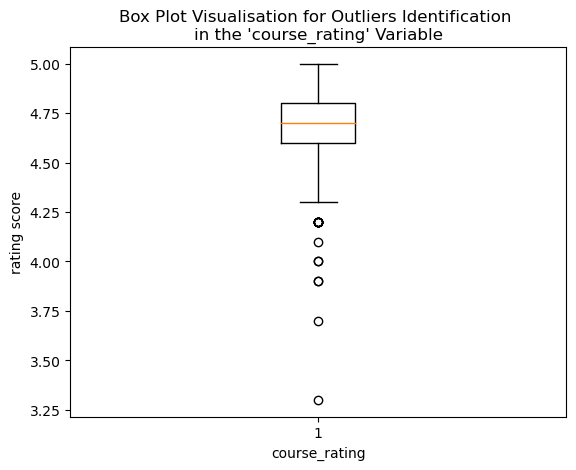

In [17]:
plt.boxplot(coursera['course_rating'])
plt.ylabel("rating score")
plt.xlabel("course_rating")
plt.title("Box Plot Visualisation for Outliers Identification \nin the 'course_rating' Variable")
plt.show()

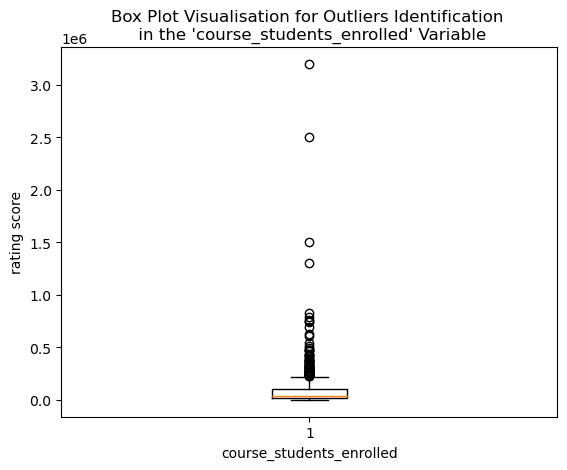

In [18]:
plt.boxplot(coursera['course_students_enrolled'])
plt.ylabel("rating score")
plt.xlabel("course_students_enrolled")
plt.title("Box Plot Visualisation for Outliers Identification \n in the 'course_students_enrolled' Variable")
plt.show()

It was decided not to remove outliers from the dataframe or to handle them in any other way.

### Understanding the categorical variables

The following section contains the code to understand and visualize categorical variables such as "course_title", "course_organization", "course_Certificate_type", and "course_difficulty". From the output is seen, that in the dataframe there are three courses with the same titles ("Developing Your Musicianship", "Marketing Digital", and "Machine learning').

In [19]:
coursera["course_title"].value_counts().sort_values(ascending=False).head()

Developing Your Musicianship                               2
Machine Learning                                           2
Marketing Digital                                          2
FinTech: Finance Industry Transformation and Regulation    1
AWS Fundamentals                                           1
Name: course_title, dtype: int64

These five organizations provide the highest numbers of courses (see bellow).

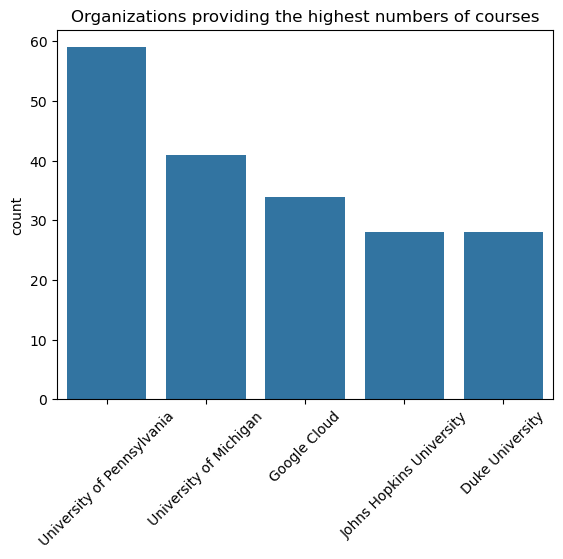

In [20]:
most_productive = pd.DataFrame(coursera["course_organization"].value_counts().head())
most_productive.columns = ["count"]
fig = sns.barplot(x=most_productive.index, y="count",
            data=most_productive, 
            errorbar="sd", color = sns.color_palette()[0]).set(title="Organizations providing the highest numbers of courses")
plt.xticks(rotation=45)
plt.show()

The dataset contains twice as many courses than specializations and only few certificates.

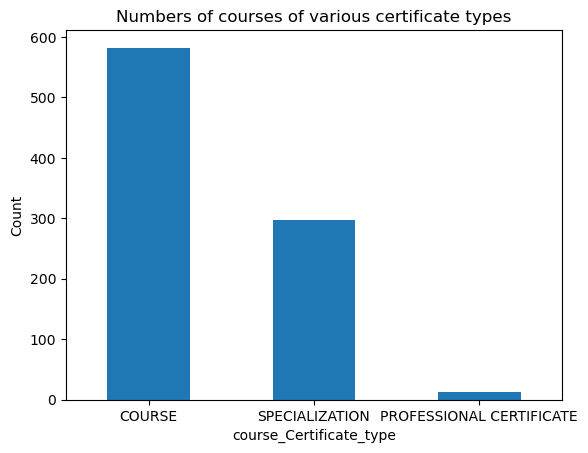

In [21]:
coursera["course_Certificate_type"].value_counts().plot(kind="bar")
plt.title("Numbers of courses of various certificate types")
plt.xlabel("course_Certificate_type")
plt.xticks(rotation=0)
plt.ylabel("Count")
plt.show()

The titles of certificates are presented bellow.

In [22]:
professional_certificate = coursera[["course_title","course_organization"]] \
[coursera["course_Certificate_type"]=="PROFESSIONAL CERTIFICATE"]
print(f'Titles of professional certificates provided by Coursera and organizations providing them:\n')
[print(x) for x in professional_certificate.values]

Titles of professional certificates provided by Coursera and organizations providing them:

['Arizona State University TESOL' 'Arizona State University']
['Cloud Engineering with Google Cloud' 'Google Cloud']
['Data Engineering with Google Cloud' 'Google Cloud']
['Google IT Automation with Python' 'Google']
['Google IT Support' 'Google']
['IBM AI Engineering' 'IBM']
['IBM Applied AI' 'IBM']
['IBM Data Science' 'IBM']
['SAS Programmer' 'SAS']
['SAS Visual Business Analytics' 'SAS']
['Soporte de Tecnologías de la Información de Google' 'Crece con Google']
['UCI Project Management' 'University of California, Irvine']


[None, None, None, None, None, None, None, None, None, None, None, None]

More than half of the Coursera courses are for the beginner level. The numbers of intermediate and mixed courses are more or less equal and only few courses are for the advance level (see bellow).

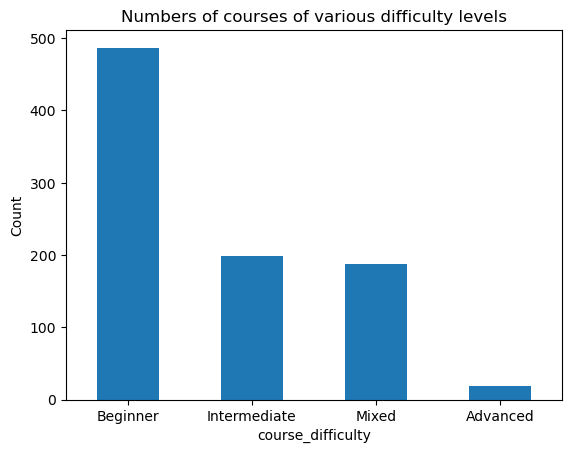

In [23]:
coursera["course_difficulty"].value_counts().plot(kind="bar")
plt.title("Numbers of courses of various difficulty levels")
plt.xlabel("course_difficulty")
plt.xticks(rotation=0)
plt.ylabel("Count")
plt.show()



### Understanding numerical variables

The following section examines numerical variables "course_rating" and "course_students_enrolled". The basic statistics (mean vales, etc.) and kernel density estimation (KDE) plots of these two variables are provided bellow. Also skewness and kurtosis values are calculated in order to check if distributions of values of these variables are symetrical and normal.

In [24]:
coursera.describe()


,course_rating,course_students_enrolled
count,891.000000,8.910000e+02
mean,4.677329,9.055208e+04
std,0.162225,1.819365e+05
min,3.300000,1.500000e+03
25%,4.600000,1.750000e+04
50%,4.700000,4.200000e+04
75%,4.800000,9.950000e+04
max,5.000000,3.200000e+06


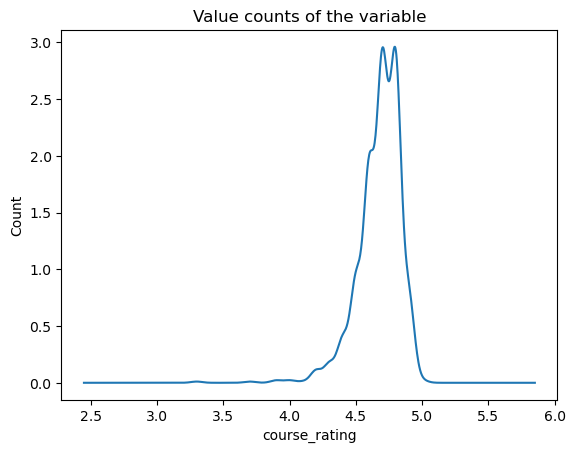

In [25]:
coursera["course_rating"].plot(kind="kde")
plt.title("Value counts of the variable")
plt.xlabel("course_rating")
plt.xticks(rotation=0)
plt.ylabel("Count")
plt.show()

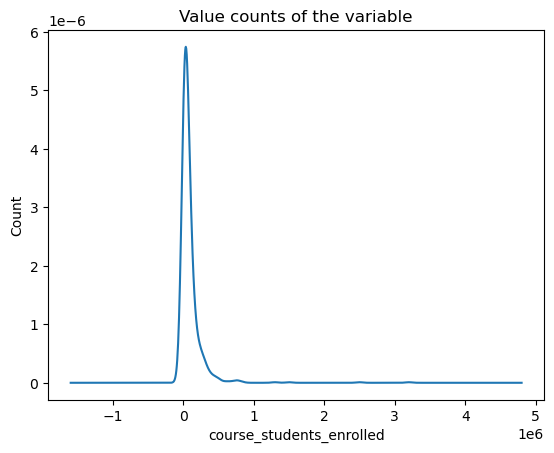

In [26]:
coursera["course_students_enrolled"].plot(kind="kde")
plt.title("Value counts of the variable")
plt.xlabel("course_students_enrolled")
plt.xticks(rotation=0)
plt.ylabel("Count")
plt.show()

Skewness values:

Symmetrical: A distribution can be called symmetric if it appears the same from the left and right from the center point.
Asymmetrical: A distribution can be called asymmetric if it doesn’t appear the same from the left and right from the center point.
Distribution on the basis of skewness value:

Skewness = 0: Then normally distributed.
Skewness > 0: Then more weight in the left tail of the distribution.
Skewness < 0: Then more weight in the right tail of the distribution.

In [27]:
print(f"Skewness for course_students_enrolled: {coursera['course_students_enrolled'].skew()}")
print(f"Skewness for course_rating: {coursera['course_rating'].skew()}")


Skewness for course_students_enrolled: 9.689091864889582
Skewness for course_rating: -1.8856235266957913


Kurtosis values:

kurtosis for normal distribution is equal to 3.
For a distribution having kurtosis < 3: It is called playkurtic.
For a distribution having kurtosis > 3, It is called leptokurtic and it signifies that it tries to produce more outliers rather than the normal distribution (see https://www.geeksforgeeks.org/how-to-calculate-skewness-and-kurtosis-in-python/)

In [28]:
print(f"Kurtosis for course_students_enrolled: {coursera['course_students_enrolled'].kurt()}")
print(f"Kurtosis for course_rating: {coursera['course_rating'].kurt()}")

Kurtosis for course_students_enrolled: 136.43338737658476
Kurtosis for course_rating: 8.634806128139028


Skewness and kurtosis values for these two values indicate that distributions of values of the variables are neither symetrical nor normal For the variable 'course_students_enrolled" skewness value indicates that there is more weight on the left tail of the distribution and distribution of the variable 'course_rating" is right-side oriented. Kurtosis values indicate that both variables are leptokurtic.

## Answerring questions and testing hypotheses about the data

The next step of the exploratory analysis is to get insights about the Coursera courses by examining and visualizing combinations of categorical and numerical variables of the dataframe. Results of the analysis are presented as responses to various questions about the data.

### What are the most and the least popular courses?

In order to answer the question about the most and least popular courses, five largest and lowest values of the variable "course_students_enrolled" as well as corresponding values of the variable "course_title" were selected and bar plots for these values were created.

In [29]:
most_popular_courses = pd.DataFrame(coursera[["course_title","course_students_enrolled"]] \
[coursera["course_students_enrolled"].isin(coursera["course_students_enrolled"].nlargest(5))])
most_popular_courses = most_popular_courses.set_index("course_title")


In [30]:
least_popular_courses = coursera[["course_title","course_students_enrolled"]] \
[coursera["course_students_enrolled"].isin(coursera["course_students_enrolled"].nsmallest(5))]
least_popular_courses = least_popular_courses.set_index("course_title")


(0.0, 100000.0)

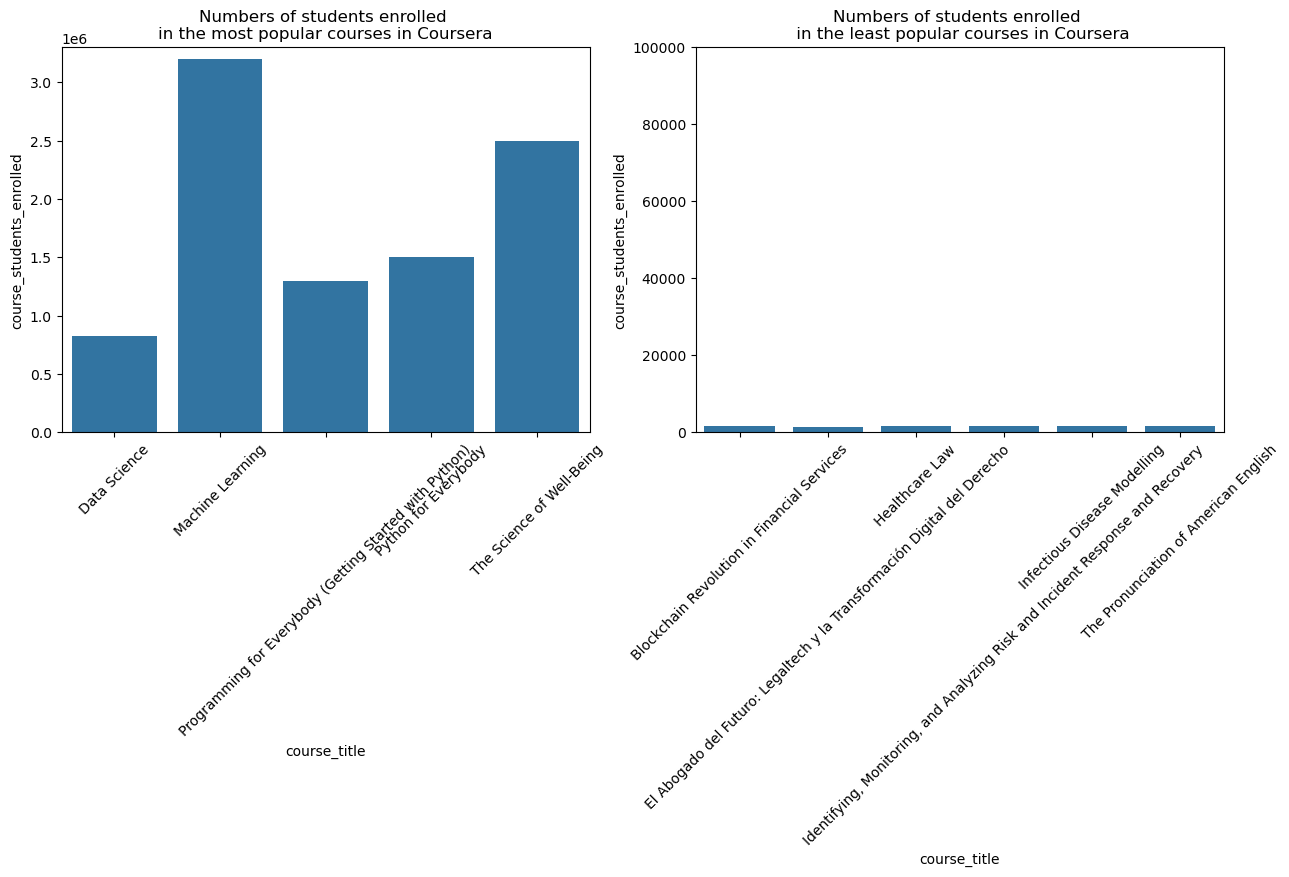

In [31]:
fig, (ax1, ax2) = plt.subplots(ncols = 2, nrows = 1, figsize = (15,5))
sns.barplot(x=most_popular_courses.index, y="course_students_enrolled",
            data=most_popular_courses, 
            errorbar="sd",color = sns.color_palette()[0],
            ax=ax1).set(title="Numbers of students enrolled \nin the most popular courses in Coursera")
ax1.tick_params(axis='x', rotation=45)
ax1.set_ylim(0, 3300000)
sns.barplot(x=least_popular_courses.index, y="course_students_enrolled", 
            data=least_popular_courses, 
            errorbar="sd",color = sns.color_palette()[0],
            ax=ax2).set(title="Numbers of students enrolled \n in the least popular courses in Coursera")
ax2.tick_params(axis='x', rotation=45)
ax2.set_ylim(0, 100000)

It can be seen from the plots that it is a very large gap between the most popular courses with the highest numbers of students and those with the lowest numbers of students. It should be taken into account that the y axis of the second subplot is drawn no the different scale than the first subplot because otherwise, if the scales were equal, bars on the second plot would not be seen.
Four out of five most popular courses in Coursera are courses on various topics of data science (machine learning, Python programming, etc.) It signifies the high demand for data science skills in the world and could be an indication for developers of training courses which training topics to choose.

### What are the least and the best valued courses?

In the same way, in order to answer the question about the best anf least valued courses, five largest and lowest values of the variable "course_rating" as well as corresponding values of the variable "course_title" were selected and bar plots for these values were created.

In [32]:
least_valued_courses = coursera[["course_title","course_rating"]] \
[coursera["course_rating"].isin(coursera["course_rating"].nsmallest(5))]
least_valued_courses = least_valued_courses.set_index("course_title")

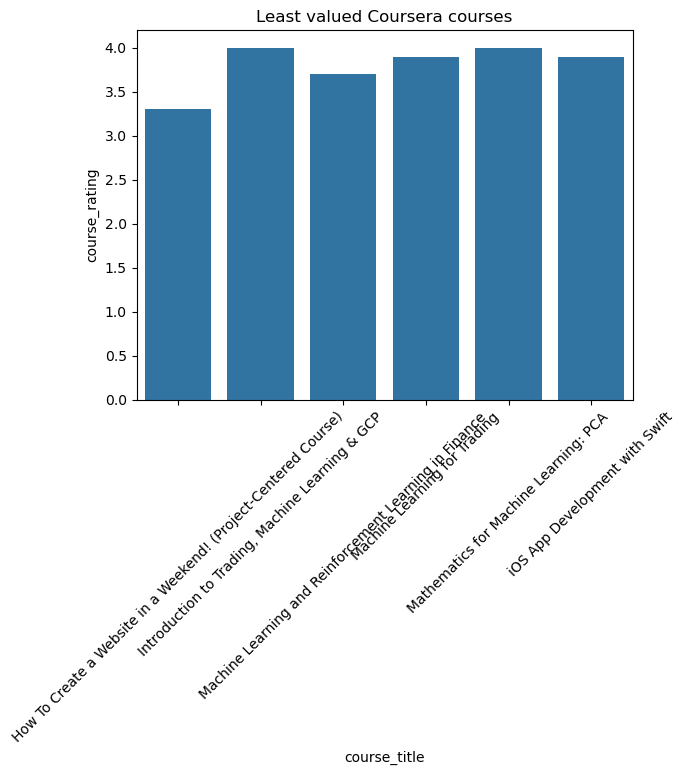

In [33]:
#plt.figure(figsize = (15,5))
fig = sns.barplot(x=least_valued_courses.index, y="course_rating",
            data=least_valued_courses, 
            errorbar="sd", color = sns.color_palette()[0]).set(title="Least valued Coursera courses")
plt.xticks(rotation=45)
plt.show()

In [34]:
best_valued_courses = coursera[["course_title","course_rating"]] \
[coursera["course_rating"].isin(coursera["course_rating"].nlargest(5))]
best_valued_courses = best_valued_courses.set_index("course_title")
best_valued_courses

,course_rating
course_title,
Agile и Scrum в работе над проектами и продуктами,4.9
American Contract Law I,4.9
Aprendiendo a aprender: Poderosas herramientas mentales con las que podrás dominar temas difíciles (Learning How to Learn),4.9
Arizona State University TESOL,4.9
Aspectos básicos de la planificación y la gestión de proyectos,4.9
...,...
Unraveling the Cycling City,4.9
Write A Feature Length Screenplay For Film Or Television,4.9
Writing in the Sciences,4.9


The best valued courses are not presented in the plot as there are 70 courses with the identical highest rating 4.9. It also can be concluded that differences between the lowest and highest rating are not very high - the lowest ratings  of the courses are in the interval from 3 to 4.

### Which organizations provide the least and the best valued courses?

In order to answer the question about organizations providing the least and best valued courses, values of the variable "course_rating" were grouped by organizations and means as well as standart deviations were calculated. The resulting dataframe was sorted first on the new variable "count" (in order to observe the course ratings of organizations providing the highest numbers of courses) and next on the variable "mean" (in order to observe ratings with the highest and the lowest mean values). As a result three subplots were drawn (see bellow).

In [35]:
organization_rating = pd.DataFrame(coursera.loc[:,("course_organization","course_rating")]. \
                                   groupby("course_organization").describe())
organization_rating[("course_rating","count")]=organization_rating[("course_rating","count")].astype(int)
organization_rating = organization_rating.sort_values(by=[("course_rating","count")],ascending=False). \
round(decimals=2)
organization_rating_top1 = \
organization_rating.loc[:,[("course_rating","count"),("course_rating","mean"),("course_rating","std")]].head()
organization_rating_top1.columns = ["count", "organization_rating_mean", "organization_rating_std"]

In [38]:
organization_rating = organization_rating.sort_values(by=[("course_rating","mean")],ascending=False)
organization_rating_top2 = organization_rating.loc[:,[("course_rating","count"),("course_rating","mean"),("course_rating","std")]].head()
organization_rating_top2.columns = ["count","organization_rating_mean", "organization_rating_std"]

In [39]:
organization_rating_least = \
organization_rating.loc[:,[("course_rating","count"),("course_rating","mean"),("course_rating","std")]].tail()
organization_rating_least.columns = ["count","organization_rating_mean","organization_rating_std"]

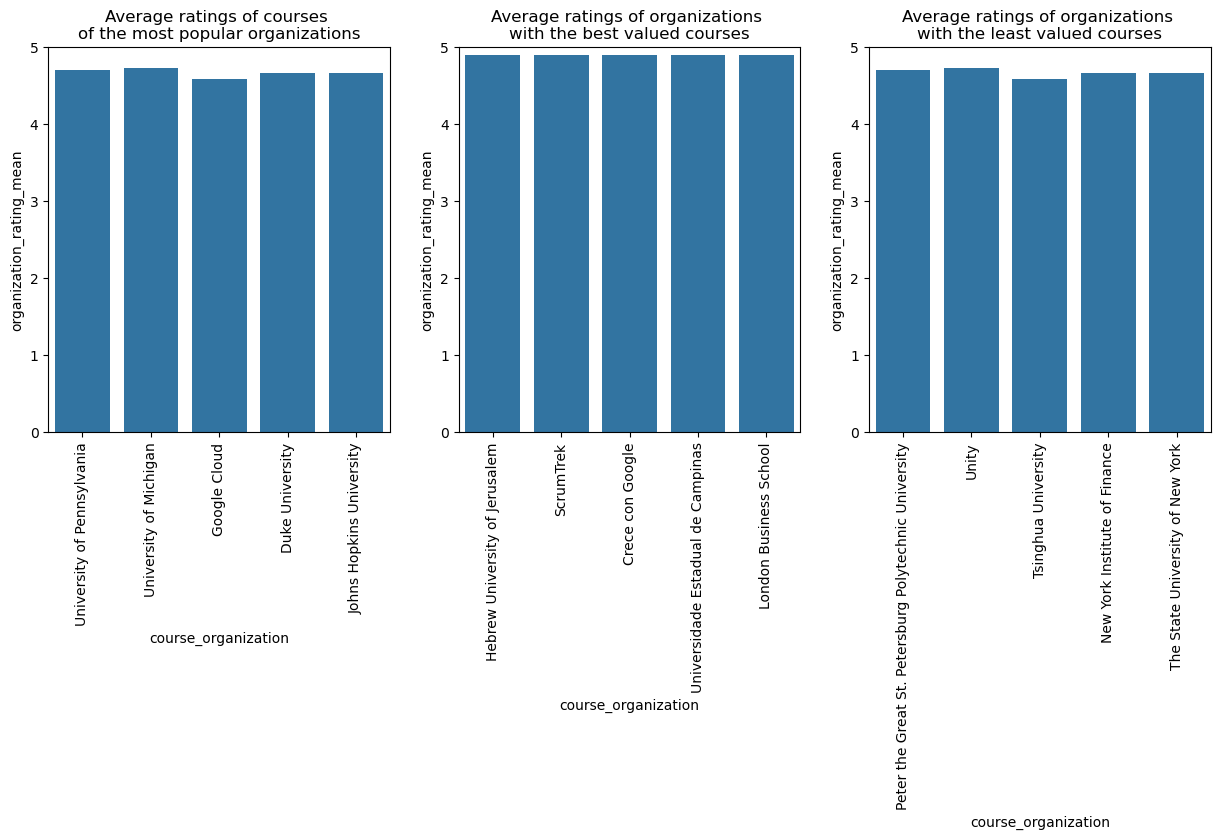

In [40]:
fig, (ax1, ax2, ax3) = plt.subplots(ncols = 3, nrows = 1, figsize = (15,5))
sns.barplot(x=organization_rating_top1.index, y="organization_rating_mean",
            data=organization_rating_top1, 
            errorbar="sd", color = sns.color_palette()[0],
            ax=ax1).set(title="Average ratings of courses \nof the most popular organizations")
ax1.tick_params(axis='x', rotation=90)
ax1.set_ylim(0, 5)
sns.barplot(x=organization_rating_top2.index, y="organization_rating_mean", 
            data=organization_rating_top2, 
            errorbar="sd",color = sns.color_palette()[0],
            ax=ax2).set(title="Average ratings of organizations \nwith the best valued courses")
ax2.tick_params(axis='x', rotation=90)
ax2.set_ylim(0, 5)
sns.barplot(x=organization_rating_least.index, y="organization_rating_mean",
            data=organization_rating_top1, 
            errorbar="sd",color = sns.color_palette()[0],
           ax=ax3).set(title="Average ratings of organizations \nwith the least valued courses")
ax3.set_ylim(0, 5)
ax3.tick_params(axis='x', rotation=90)

It can be seen from the plots that organizations which are the most productive - that is, they provide highest numbers of courses - have lower average ratings that organizations which provide single or few courses (the second subplot). However, in general the difference between ratings of organizations providing best and least valued courses is not very high. (It is possible to conduct nonparametric Kruscal Wallis test in order to check is the difference is statistically significant).

### Which organizations provide the least and the most popular courses?

In teh same way, in order to answer the question about organizations providing the least and most popular courses, values of the variable "course_students_enrolled" were grouped by organizations and means as well as standart deviations were calculated. The resulting dataframe was sorted first on the new variable "count" (in order to observe the average numbers of students of organizations providing the highest numbers of courses) and next on the variable "mean" (in order to observe average numbers of students enrolled in the most and least popular courses). As a result three subplots were drawn (see bellow).

In [41]:
organization_students_enrolled = pd.DataFrame(coursera.loc[:,("course_organization","course_students_enrolled")]. \
                                              groupby("course_organization").describe())
organization_students_enrolled[("course_students_enrolled","count")]= \
organization_students_enrolled[("course_students_enrolled","count")].astype(int)
organization_students_enrolled = organization_students_enrolled. \
sort_values(by=[("course_students_enrolled","count")],ascending=False).round(decimals=0)
organization_students_enrolled_top1 = \
organization_students_enrolled.loc \
[:,[("course_students_enrolled","count"),("course_students_enrolled","mean"),
    ("course_students_enrolled","std")]].head()
organization_students_enrolled_top1.columns = ["count", "students_enrolled_mean", "students_enrolled_std"]

In [42]:
organization_students_enrolled = organization_students_enrolled. \
sort_values(by=[("course_students_enrolled","mean")],ascending=False)
organization_students_enrolled_top2 = \
organization_students_enrolled.loc \
[:,[("course_students_enrolled","count"),("course_students_enrolled","mean"),
    ("course_students_enrolled","std")]].head()
organization_students_enrolled_top2.columns = ["count", "students_enrolled_mean", "students_enrolled_std"]

In [43]:
organization_students_enrolled_least = \
organization_students_enrolled.loc \
[:,[("course_students_enrolled","count"),("course_students_enrolled","mean")]].tail()
organization_students_enrolled_least.columns = ["count","students_enrolled_mean"]

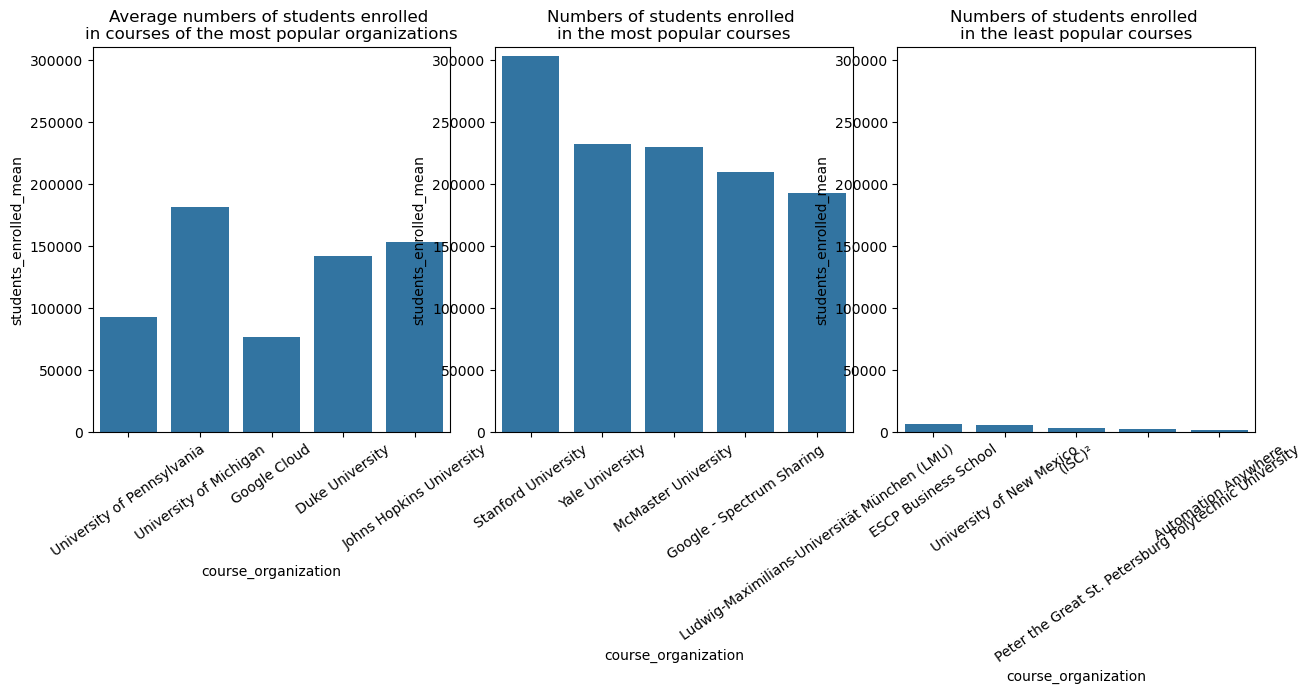

In [44]:
fig, (ax1, ax2, ax3) = plt.subplots(ncols = 3, nrows = 1, figsize = (15,5))
fig.subplots_adjust(hspace=0.125, wspace=0.125)
sns.barplot(x=organization_students_enrolled_top1.index, y="students_enrolled_mean",
            data=organization_students_enrolled_top1, 
            errorbar="sd",color = sns.color_palette()[0],
            ax=ax1).set(title="Average numbers of students enrolled \nin courses of the most popular organizations")
ax1.set_ylim(0,310000)
ax1.tick_params(axis='x', rotation=35)
sns.barplot(x=organization_students_enrolled_top2.index, y="students_enrolled_mean", 
            data=organization_students_enrolled_top2, 
            errorbar="sd",color = sns.color_palette()[0],
            ax=ax2).set(title="Numbers of students enrolled \nin the most popular courses")
ax2.set_ylim(0,310000)
ax2.tick_params(axis='x', rotation=35)
sns.barplot(x=organization_students_enrolled_least.index, y="students_enrolled_mean", 
            data=organization_students_enrolled_least, 
            errorbar="sd",color = sns.color_palette()[0],
            ax=ax3).set(title="Numbers of students enrolled \nin the least popular courses")
ax3.set_ylim(0,310000)
ax3.tick_params(axis='x', rotation=35)

It can be seen that average numbers of enrolled students in the organizations which provide highest numbers of courses are lower than numbers of students in the organizations which provide courses with highest numbers of students. It can indicate different marketing strategies of organizations - some organizations focus on quantity (that is, provide many  courses with are not in the list of the most popular courses) while others focus on quality (they provide one or few courses which gain the high popularity).
Also, it can be observed that four out of five organizations providing the most popular courses as well as four out of five organizations with highest numbers of courses are universities. 

### What are differences in course ratings among various levels of course difficulty and types of certificates?

In order to answer the question about differences in course ratings among various levels of course difficulty and types of certificates two corresponding violin subplots were drawn (see bellow). 

<AxesSubplot: xlabel='course_Certificate_type', ylabel='course_rating'>

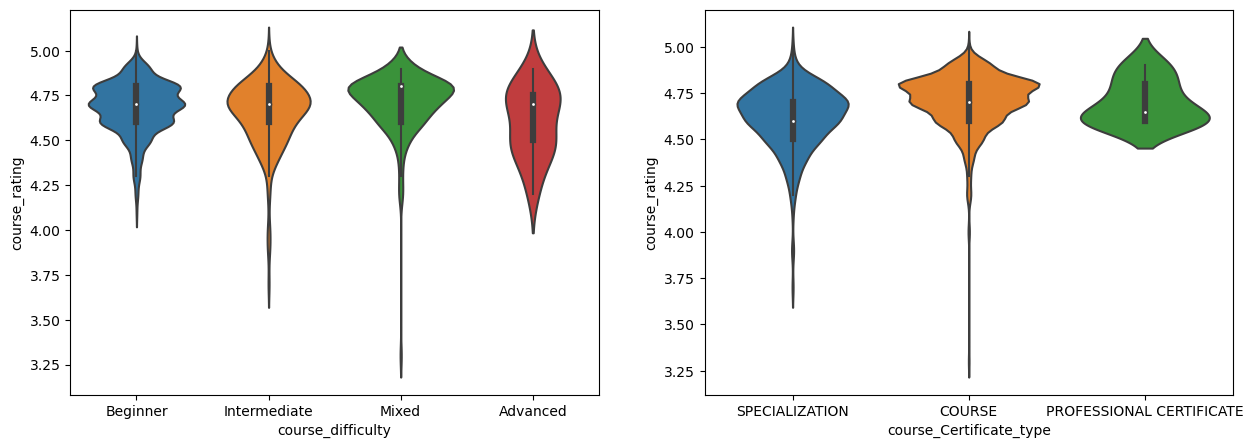

In [45]:
fig, (ax1, ax2) = plt.subplots(ncols = 2, nrows = 1, figsize = (15,5))
sns.violinplot(data=coursera, x="course_difficulty", y="course_rating", ax=ax1)
sns.violinplot(data=coursera, x="course_Certificate_type", y="course_rating", ax=ax2)

It can be observed from the subplots that the differences in course ratings in the different groups are not high and probably they are not statistically significant (to test the hipothesis of statistical significance, non-parametric Kruscal-Wallis tests could be conducted). Also, it can be seen that there is a a higher variance of variable values in the "mixed" group of the variable "course_difficulty" and the "course" group of the variable "course_Certificate_type" which indicates that possiblly outliers are in these groups (some courses which have comparablly very low ratings). 

### What are differences in numbers of students enrolled among various levels of course difficulty and types of certificates?

Similarly, in order to answer the question about differences in numbers of students enrolled among various levels of course difficulty and types of certificates, two corresponding violin subplots were drawn with the x axis for categorical variables "course_difficulty" and "course_Certificate_type" and y axis for the numerical variable "course_students_enrolled".

<AxesSubplot: xlabel='course_Certificate_type', ylabel='course_students_enrolled'>

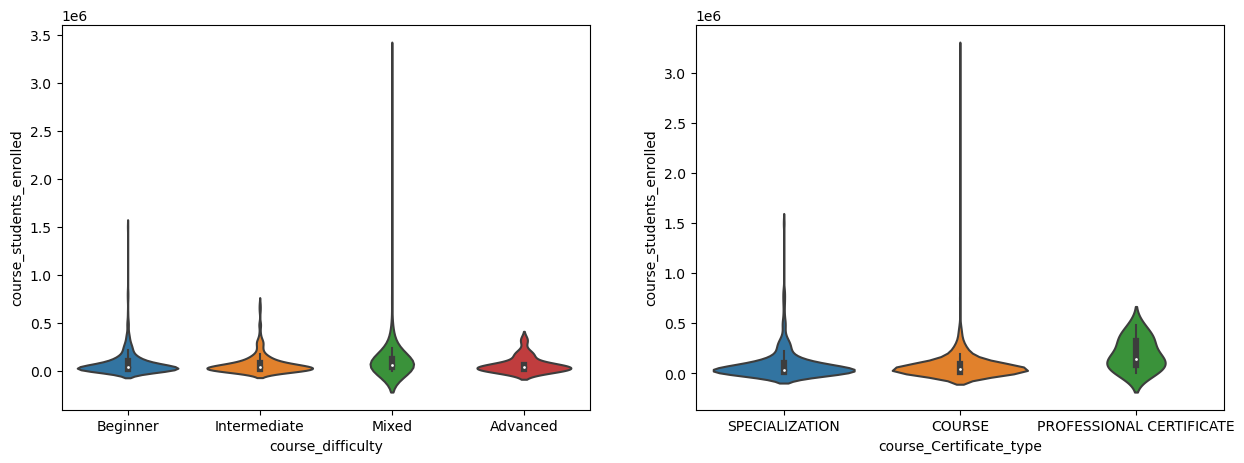

In [46]:
fig, (ax1, ax2) = plt.subplots(ncols = 2, nrows = 1, figsize = (15,5))
sns.violinplot(data=coursera, x="course_difficulty", y="course_students_enrolled", ax=ax1)
sns.violinplot(data=coursera, x="course_Certificate_type", y="course_students_enrolled", ax=ax2)

It can be observed from the subplots that differences of numbers of enrolled students among the groups are not high and probably not statistically significant - it can be concluded that course difficulty and course certificate type does not affect the popularity of Coursera courses. Also, similarly as in in the previous subplots, the outliers can be indicated in the "mixed" and "course" groups.

### Testing if the hypothesis  that the course ratings are positively correlated with the number of enrolled students

In order to test this hypothesis, correlation coefficient between two numerical variables - "course_rating" and "course_students_enrolled" - was calculated with the help of the Python function presented bellow.

In [47]:
coursera_corr = coursera.iloc[:,3:6].drop("course_difficulty",axis=1)
corr_matrix = pd.DataFrame(coursera_corr.corr())
corr_matrix

,course_rating,course_students_enrolled
course_rating,1.00000,0.07109
course_students_enrolled,0.07109,1.00000


In [48]:
def find_pos_correlation(corr_matrix, coef):
    for i in range(len(corr_matrix.iloc[0,:])):
        for j in range(len(corr_matrix.iloc[:,0])):
            if (corr_matrix.iloc[j,i] > coef) & (corr_matrix.iloc[j,i] != 1):
                print(f'There is a strong positive correlation between features \
                {corr_matrix.iloc[:,i].name} and {corr_matrix.iloc[j,:].name}. \
                The value of the correlation coeficient is {round(corr_matrix.iloc[j,i],3)}.')

In [49]:
find_pos_correlation(corr_matrix, 0.75)


The hypothesis has not been confirmed as there is no correlation between the course rating adn the number of enrolled students (the criterion for the strong positive correlation was set to 0.75 while the actual value of the correlation coeficient is 0.07).

## Geographical visualisation of the Coursera course data

The next step of exploratory data analysis was to visualize data as a geographical information system (GIS). In order to create such visualizations, the third party API (forward and reverse geocoding API developed by Location IQ (https://us1.locationiq.com) which allow to gather location data from names of organizations and from geographical coordinates (lattitude and longitude) were used. Also, the Python library geopandas was used to visualize the data on the world map.

### Getting locations of organizations providing courses

This section presents the function which was designed to fetch and filter geolocation data from the API in json format. Also, the dataframe with organizations as indexes and numerical variables of "count", "mean_rating", "mean_students_enrolled" was prepared. Then, the new 'geolocations" dataframe was created by fetching location data for each organization and combining them with average values of course ratings and numbers of enrolled students for each organization. 

In [48]:
def fetch_location(place):
    '''
    The function to fetch location data with the help of forward and reverse geocoding API's
    '''
    url1 = "https://us1.locationiq.com/v1/search"
    url2 = "https://us1.locationiq.com/v1/reverse"
    ACCESS_TOKEN = 'pk.8264af8232ad5704924bcddd49f62afb'
    SEARCH_STRING = place
    data1 = {'key': ACCESS_TOKEN,
    'q': SEARCH_STRING,
    'format': 'json'
    }
    
    r = requests.get(url1, params = data1) 
    status_code = r.status_code
    response = r.json()
    if status_code == 200:
       lat = response[0]['lat']
       lng = response[0]['lon']
       data2 = {'key': ACCESS_TOKEN,
            'lat': lat,
            'lon' : lng,
            'format': 'json'
            }
       rev = requests.get(url2, params = data2)
       rev_response = rev.json()
       country = rev_response['address']['country']
       country_code = rev_response['address']['country_code']
    else:
       lat = ''
       lng = ''
       country = ''
       country_code = ''
    data = {'status_code': status_code,
                 'lat': lat,
                 'lng': lng,
                 'country': country,
                 'country_code': country_code
    }
    return data
        

In [49]:
organization_students_enrolled=pd.DataFrame(organization_students_enrolled)
organization_rating=pd.DataFrame(organization_rating)
organizations = pd.concat([organization_students_enrolled,organization_rating], axis=1)
organizations = organizations.loc \
[:,[("course_students_enrolled","count"),("course_students_enrolled","mean"),("course_rating","mean")]]
organizations.head()


course_students_enrolled  \
                                                                count   
course_organization                                                     
Stanford University                                                16   
Yale University                                                    17   
McMaster University                                                 1   
Google - Spectrum Sharing                                           1   
Ludwig-Maximilians-Universität München (LMU)                        2   

                                                       course_rating  
                                                  mean          mean  
course_organization                                                   
Stanford University                           303375.0          4.77  
Yale University                               232471.0          4.82  
McMaster University                           230000.0          4.80  
Google - Spectrum Sharing                     210000.0          4.90  
Ludwig-Maximilians-Universität München (LMU)  192500.0          4.75

In [95]:
geolocations1 = []
organ = list(organizations.index.values)
for i in range(0,42):
    location = fetch_location(organ[i])
    location["course_organization"] = organ[i]
    location["count"] = organizations.iloc[i,0]
    location["mean_rating"] = organizations.iloc[i,2]
    location["mean_students_enrolled"] = organizations.iloc[i,1]
    time.sleep(2)
    geolocations1.append(location)

In [96]:
geolocations2 = []
organ = list(organizations.index.values)
for i in range(42,90):
    location = fetch_location(organ[i])
    location["course_organization"] = organ[i]
    location["count"] = organizations.iloc[i,0]
    location["mean_rating"] = organizations.iloc[i,2]
    location["mean_students_enrolled"] = organizations.iloc[i,1]
    time.sleep(2)
    geolocations2.append(location)

In [97]:
geolocations3 = []
organ = list(organizations.index.values)
for i in range(90,154):
    location = fetch_location(organ[i])
    location["course_organization"] = organ[i]
    location["count"] = organizations.iloc[i,0]
    location["mean_rating"] = organizations.iloc[i,2]
    location["mean_students_enrolled"] = organizations.iloc[i,1]
    time.sleep(2)
    geolocations3.append(location)

In [98]:
geolocations1 = pd.DataFrame(geolocations1)
geolocations2 = pd.DataFrame(geolocations2)
geolocations3 = pd.DataFrame(geolocations3)
geolocations = pd.concat([geolocations1,geolocations2, geolocations3],axis=0)

In [100]:
geolocations.to_csv('/Users/user/PycharmProjects/Coursera/data/geolocations.csv')

### Preparing country data for the visualization

In order to visualize the data from the "geolocations" dataframe, the data were grouped by the variable "country" (retrieved from the API). Also, the multipolygon and polygon data which provide shapes of all countries of the world were retrieved with the help of geopandas library. These two dataframes ("countries" and "world") were merged into the dataframe "merge_map" (see bellow).

In [50]:
geolocations = pd.read_csv('/Users/user/PycharmProjects/Coursera/data/geolocations.csv', encoding="UTF-8")

In [51]:
geolocations.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 154 entries, 0 to 153
Data columns (total 10 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   Unnamed: 0              154 non-null    int64  
 1   status_code             154 non-null    int64  
 2   lat                     144 non-null    float64
 3   lng                     144 non-null    float64
 4   country                 144 non-null    object 
 5   country_code            144 non-null    object 
 6   course_organization     154 non-null    object 
 7   count                   154 non-null    int64  
 8   mean_rating             154 non-null    float64
 9   mean_students_enrolled  154 non-null    float64
dtypes: float64(4), int64(3), object(3)
memory usage: 12.2+ KB


In [52]:
countries_rating = pd.DataFrame(geolocations.loc[:,("country","mean_rating")].groupby("country").describe())
countries_count = pd.DataFrame(geolocations.loc[:,("country","count")].groupby("country").describe())
countries_students_enrolled = pd.DataFrame(geolocations.loc[:,("country","mean_students_enrolled")] \
                                           .groupby("country").describe())

In [53]:
countries = pd.concat([countries_count,countries_rating,countries_students_enrolled],axis=1)
countries = countries.loc[:,[("mean_rating","mean"),("mean_students_enrolled","mean"),("count","count")]] \
.round(decimals=2)

In [54]:
countries[("count","count")] = countries[("count","count")].astype(int)
countries[("mean_students_enrolled","mean")] = countries[("mean_students_enrolled","mean")].astype(int)
countries = countries.reset_index(drop=False)
countries.columns = ["name","country_rating_mean","country_students_enrolled_mean","count"]
#countries.loc[0,"name"] = countries.loc[0,"name"].replace('','Non_identified')

In [55]:
countries = countries.set_index("name")
countries["count"]=countries["count"].astype(int)

In [56]:
world = gpd.read_file(gpd.datasets.get_path('naturalearth_lowres'))
# rename the columns so that we can merge with our data
world.columns=['pop_est', 'continent', 'name', 'CODE', 'gdp_md_est', 'geometry']



In [57]:
world.loc[176,"name"] = world.loc[176,"name"].replace('S. Sudan','South Sudan')
world = world.set_index("name")

In [58]:
merge_map = pd.concat([world,countries],join="outer",axis=1)
merge_map.head()

,pop_est,continent,CODE,gdp_md_est,geometry,country_rating_mean,country_students_enrolled_mean,count
name,,,,,,,,
Fiji,889953.0,Oceania,FJI,5496.0,"MULTIPOLYGON (((180.00000 -16.06713, 180.00000...",NaN,NaN,NaN
Tanzania,58005463.0,Africa,TZA,63177.0,"POLYGON ((33.90371 -0.95000, 34.07262 -1.05982...",NaN,NaN,NaN
W. Sahara,603253.0,Africa,ESH,907.0,"POLYGON ((-8.66559 27.65643, -8.66512 27.58948...",NaN,NaN,NaN
Canada,37589262.0,North America,CAN,1736425.0,"MULTIPOLYGON (((-122.84000 49.00000, -122.9742...",4.73,70986.0,5.0
United States of America,328239523.0,North America,USA,21433226.0,"MULTIPOLYGON (((-122.84000 49.00000, -120.0000...",4.67,71505.0,58.0


Output for the command "geolocations.info()" indicates that the country data was retrieved for 144 out of 154 organizations. That is, the API was not able to retrieve location data for 10 organizations.

### Visualizing Coursera data by countries on the world map

This section presents three plots which were drawn from the dataframe "merge_world" containing geolocation data and data on the numbers of courses, average course ratings and average numbers of enrolled students. Green color indicates higher values of these variables and red color - lower values of the variables. 

/opt/miniconda3/envs/geoenv/lib/python3.10/site-packages/mapclassify/classifiers.py:255: UserWarning: Not enough unique values in array to form 15 classes. Setting k to 9.
  warnings.warn(


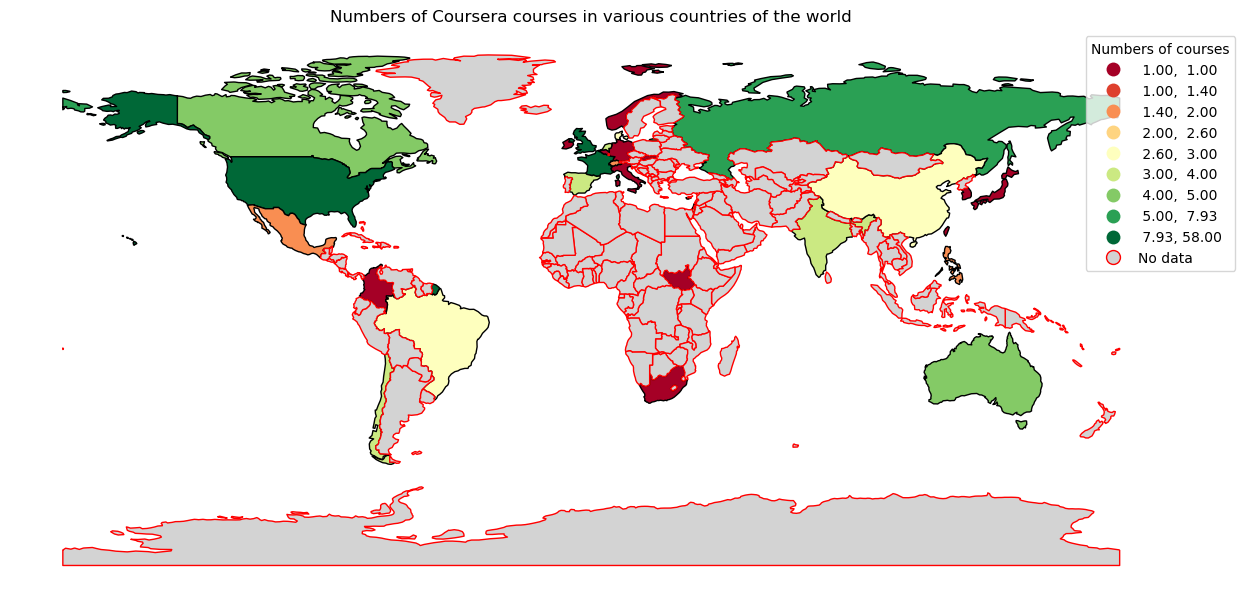

In [59]:
ax = merge_map.plot(
    figsize=(15,8), column="count", legend=True, cmap="RdYlGn", edgecolor="k",
        scheme="quantiles", k=15,          
               missing_kwds={
        "color": "lightgrey",
        "edgecolor": "red",
        "label": "No data",
    })
ax.set_title("Numbers of Coursera courses in various countries of the world")
ax.set_axis_off()
leg = ax.get_legend()
leg.set_bbox_to_anchor((1.06,1))
leg.set_title("Numbers of courses")


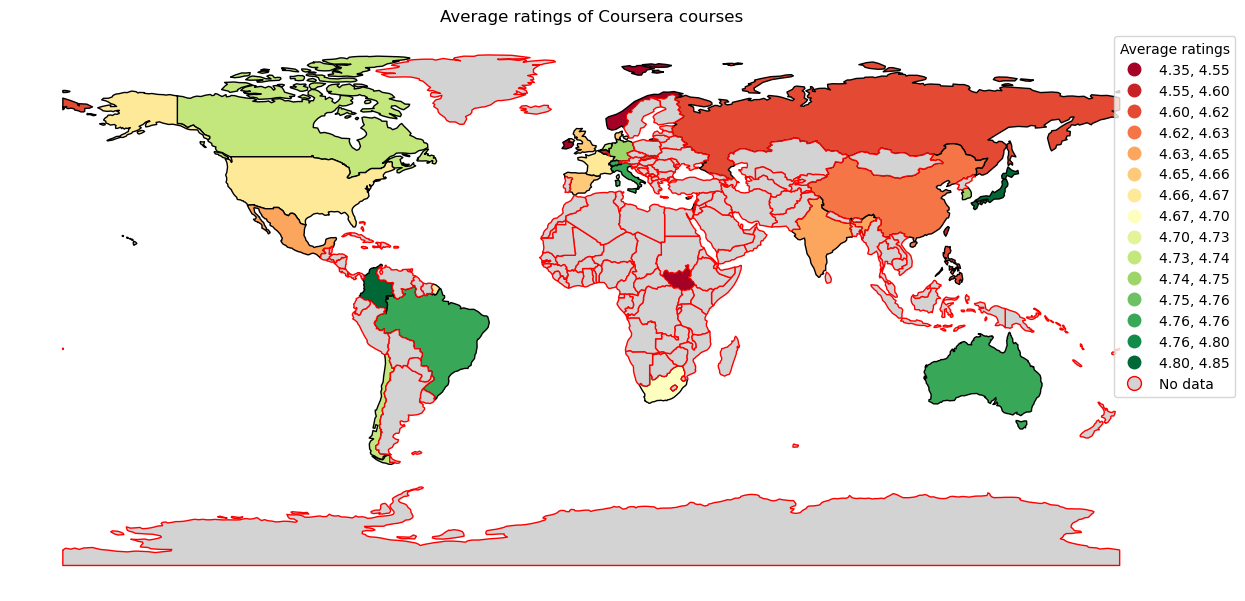

In [60]:
ax = merge_map.plot(
    figsize=(15,8), column="country_rating_mean", legend=True, cmap="RdYlGn", edgecolor="k",
        scheme="quantiles", k=15,          
               missing_kwds={
        "color": "lightgrey",
        "edgecolor": "red",
        "label": "No data",
    })
ax.set_title("Average ratings of Coursera courses")
ax.set_axis_off()
leg = ax.get_legend()
leg.set_bbox_to_anchor((1.06,1))
leg.set_title("Average ratings")


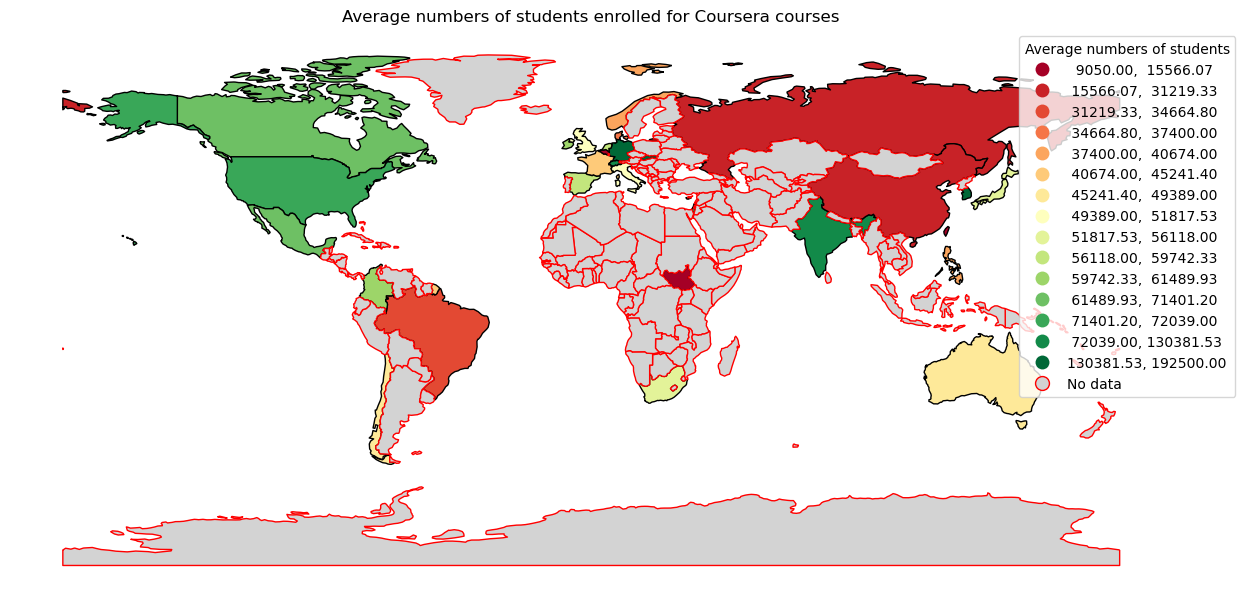

In [61]:
ax = merge_map.plot(
    figsize=(15,8), column="country_students_enrolled_mean", legend=True, cmap="RdYlGn", edgecolor="k",
        scheme="quantiles", k=15,          
               missing_kwds={
        "color": "lightgrey",
        "edgecolor": "red",
        "label": "No data",
    })
ax.set_title("Average numbers of students enrolled for Coursera courses")
ax.set_axis_off()
leg = ax.get_legend()
leg.set_bbox_to_anchor((1.06,1))
leg.set_title("Average numbers of students")


It can be observed from the plots that the highest numbers of courses are developed in such countries as the USA, France, the United Kingdom. However, the courses with the highest ratings are developed in such countries as Australia, Brasil and Columbia. The most popular (with the highest numbers of students) are developed in such countries as Germany, the USA, India.

## Conclusions and suggestions for improvement

The exploratory data analysis of the Coursera course data helped to better understand the competitive environment of massive open online courses (MOOC) as the Coursera is one of the major players in this market. The analysis revealed that courses on various topics of data science are the most popular in Coursera. The major providers of courses in Coursera are the US universities (providing the highest numbers of courses), however, they not necessarily provide the most popular and highest-ranked courses. There is no positive correlation between quality (course ratings) and popularity (numbers of students enrolled) and no positive relationship betwen quality and productivity (numbers of courses developed). 
The analysis could be improved by coducting tests of statistical significance (Kruscal-Wallis tests). Also, it is possible to retrieve and map location data not only for different countries but also for different regions (for example, the US states). Some visualisations provided here could be better designed (for example, overlaps removed, names of countries labeled, interactivity added, etc.).

## Resources

1. Location IQ, https://us1.locationiq.com/
2. YAĞCI H.E. Detecting and Handling Outliers with Pandas, Medium, January 15 2021, https://hersanyagci.medium.com/detecting-and-handling-outliers-with-pandas-7adbfcd5cad8
3. What is Considered to Be a “Strong” Correlation?, January 22 2020, https://www.statology.org/what-is-a-strong-correlation/